In [2]:
from gensim.models import Word2Vec

w2v = Word2Vec.load("model_lemmas/model.pkl")

In [19]:
word = u"горшок"

similar = w2v.most_similar(positive=[word], topn=100)
for w, wt in similar[:10]:
    print w, wt

word_vectors = [w2v[w] for w, wt in similar]

горшочек 0.710592567921
кастрюля 0.657353281975
глиняный 0.655084609985
ваза 0.64835268259
кувшин 0.647891879082
миска 0.642350077629
кадка 0.640842735767
корчага 0.613799750805
черепок 0.60687994957
таз 0.606725931168


In [26]:
from sklearn.cluster import KMeans

clf = KMeans(n_clusters=3, random_state=42)
clf_res = clf.fit_predict(word_vectors)

from collections import Counter
Counter(clf_res)

Counter({0: 37, 1: 23, 2: 40})

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_res = pca.fit_transform(word_vectors)

print pca_res[:2]

[[-0.08377615 -0.88522571]
 [-1.3223666   0.41424483]]


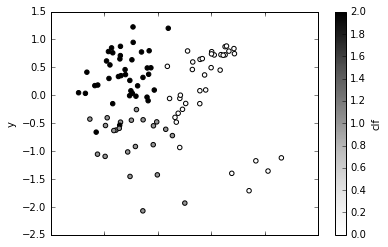

In [28]:
%matplotlib inline

import pandas as pd

df = pd.DataFrame.from_dict({
    "x": pca_res[:,0],
    "y": pca_res[:,1],
    "clf": clf_res,
})
df.plot.scatter(x="x", y="y", c="clf")

In [33]:
for (w, wt), class_ in zip(similar, clf_res)[:50]:
    if class_ == 2:
        print w, wt

кастрюля 0.657353281975
миска 0.642350077629
корчага 0.613799750805
таз 0.606725931168
плошка 0.605731248856
кастрюлька 0.59911775589
чайник 0.581162214279
кринка 0.578737616539
котелок 0.570973515511
кадушка 0.570766150951
ведро 0.569090008736
рукомойник 0.56697589159
половник 0.563946545124
лохань 0.563138127327
чугунок 0.55902659893
самовар 0.555512785912
жаровня 0.551785111427
эмалированный 0.550399661064
сковородка 0.5481377244
ковшик 0.547262310982
корыто 0.546737611294
котел 0.544004321098
черпак 0.533239126205
крынка 0.532097935677
бадья 0.529496371746
бадейка 0.529367983341
тазик 0.521232008934
